<a href="https://colab.research.google.com/github/eduardoscovino/Pokemon-analysis/blob/main/Pokemon_Analysis_With_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import bar_chart_race as bcr
from ipywidgets import interact, fixed, interact_manual
import ipywidgets as widgets
from pywaffle import Waffle
import squarify

In [ ]:
df = pd.read_csv('drive/MyDrive/Kaggle/Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## The variables of the dataset

* `Name:` Name of the pokemon
* `Type 1:` Each pokemon has a type. Ex: Grass, water, fire...
* `Type 2:` A pokemon can also have more than one type
* `Total:` The whole power of the pokemon, which is the sum of its attibutes (the following columns)
* `HP:` Hit points (or health), which is the impact a pokemon can handle before being out of combat
* `Attack:` Power of normal attacks
* `Defense:` Power of resistence against normal attacks
* `Sp. Atk:` Power of the special attack
* `Sp. Def:` Power of resistence against special attacks
* `Speed:` The criteria to define which pokemon attacks first each round
* `Generation:` From which generation is the pokemon
* `Legendary:` A boolean variable to inform if the pokemon is legendary or not

## Data Cleaning

Actually, I rather prefer working with columns written uppercased. So, let's do this now.

In [ ]:
df.columns = df.columns.str.upper()
df.head()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
df.loc[df.NAME.str.contains('Mega')].head()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False


If we look at the pokemons whose name contains 'Mega', we see that the strings before the 'Mega' are unnecessary.

So let's cut the strings before the 'Mega' in our dataset.

In [ ]:
df.NAME = df.NAME.str.replace(".*(?=Mega)", "")
df.head()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Treatment for null values

In [ ]:
print(df.isnull().sum().sort_values(ascending=False) / df.shape[0])

TYPE 2        0.4825
#             0.0000
NAME          0.0000
TYPE 1        0.0000
TOTAL         0.0000
HP            0.0000
ATTACK        0.0000
DEFENSE       0.0000
SP. ATK       0.0000
SP. DEF       0.0000
SPEED         0.0000
GENERATION    0.0000
LEGENDARY     0.0000
dtype: float64


It seems only the `TYPE 2` has null values, which makes sense. These are the pokemons that don't have a dual type. In this case, let's replace the null values with "Type 1".

In [ ]:
df['TYPE 2'].fillna('Type 1', inplace=True)
df.loc[df['TYPE 2'] == 'Type 1'].head()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
4,4,Charmander,Fire,Type 1,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,Type 1,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,Type 1,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,Type 1,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,Type 1,530,79,83,100,85,105,78,1,False


## First impressions of the dataset

In [ ]:
print('{} rows'.format(df.shape[0]))
print('{} pokemons'.format(df.NAME.unique().size))

800 rows
800 pokemons


As we've got 1 pokemon per row, it's a good idea to put the column `NAME` as the index of the dataframe. Even more, the column `#` doens't make much sense to the analysis. Let's drop it.

In [ ]:
df.set_index('NAME', inplace=True)
df.head()

,#,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,Type 1,309,39,52,43,60,50,65,1,False


In [ ]:
df=df.drop(['#'],axis=1) # we don't need this column anymore

In the following code, there's the statistical summary, just to see what's going on with the famous metrics, such as mean, quartiles, max and min.

In [ ]:
df_summary = df.describe() # basic statistic informations
df_summary

,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## Visualizations

### Histograms

Let's see how is the distribution of the attibutes using the histogram.

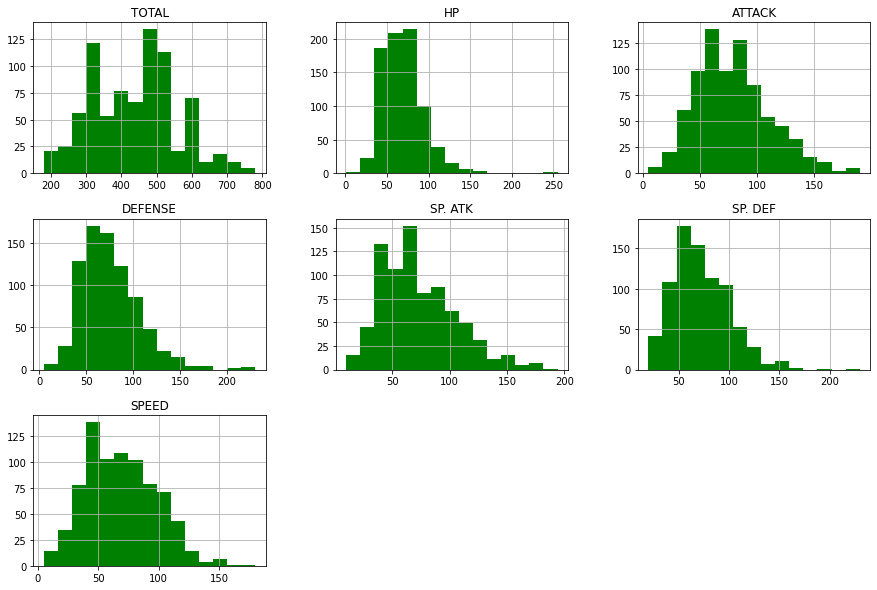

In [ ]:
df[[
  'TOTAL',
  'HP',
  'ATTACK',
  'DEFENSE',
  'SP. ATK',
  'SP. DEF',
  'SPEED'
]].hist(bins = 15, figsize =(15, 10), color='green');

### Treemap of types

With a treemap as the alternative used here, we can see in an interactive way how the number of pokemons by type in a consolidated vision for all the generations.

It's possible to see how the distribution changes between the generations with the dropdown.

In [ ]:
def f(gen):
  df_gen = df.loc[df.GENERATION == gen] # filtering only the pokemons of the argument received

  # grouping the pokemons by type 1
  df_intermed = pd.DataFrame(df_gen['TYPE 1'].value_counts())
  df_intermed.reset_index(inplace=True)
  df_intermed.rename(columns={'index':'TYPE', 'TYPE 1':'QTD'}, inplace=True)
  df_intermed['Label'] = np.where(df_intermed['QTD']>=5, df_intermed['TYPE'], 'Other') # less then 5 pokemons will be called 'others'
  # print(df_intermed)

  # grouping by the Label: Type 1 with the addition 'Others' for less than 40 pokemons
  df_treemap = pd.DataFrame(df_intermed.groupby('Label').QTD.sum())
  df_treemap.reset_index(inplace=True)
  df_treemap['PERCENT'] = round(((df_treemap['QTD'] / df_treemap['QTD'].sum()) * 100), 1)
  df_treemap['Percent'] = df_treemap['PERCENT'].apply(lambda x: str(x)) # qtd in string to concatenate with the name of type
  df_treemap['Label'] = df_treemap['Label'] + ' (' +  df_treemap['Percent'] + '%)'

  # plotting
  color = 'black'
  mpl.rcParams['text.color'] = color
  mpl.rcParams['font.size'] = 16
  plt.figure(figsize=(15,10))
  squarify.plot(sizes=df_treemap['QTD'], label=df_treemap['Label'].to_list(), 
                alpha=1, pad=True)
  plt.axis('off')
  plt.show()

interact(f, gen = df['GENERATION'].unique());

interactive(children=(Dropdown(description='gen', options=(1, 2, 3, 4, 5, 6), value=1), Output()), _dom_classe…

### Building an iteractive graphic

The idea here is to compare top 50 of two different types of pokemon to try to predict what would happen in a battle.

In this case, I plotted a x,y with Attack and Defense, and to differentiate the two types, the first type of the input is the red star and the second one is the blue ball.

There's a dropdown below for the user input the desired pokemon type.

The main goal is to analyze if your pokemon has better chances of winning a battle according to the type of its opponent. It could be very useful if you're trying to capture a new pokemon or maybe in a tournament.

In [ ]:
def f(type1, type2):
  df1 = df[(df['TYPE 1'] == type1)]
  df2 = df[(df['TYPE 1'] == type2)]
  plt.scatter(df1.ATTACK.head(50), df1.DEFENSE.head(50), color = 'Orange', label = type1, marker = "*", s = 50)
  plt.scatter(df2.ATTACK.head(50), df2.DEFENSE.head(50), color = 'Green', label = type2, marker = "x", s = 25)
  plt.xlabel("ATTACK")
  plt.ylabel("DEFENCE")
  plt.legend()
  plt.plot()
  fig=plt.gcf()
  fig.set_size_inches(12,6) #set the size for the figure
  plt.show()

interact(f, type1 = df['TYPE 1'].unique(), type2 = df['TYPE 1'].unique());

interactive(children=(Dropdown(description='type1', options=('Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poiso…

### Violin plot

Let's plot a violin plots to see the strongest generation

Insight: Gens 1 and 3 have the most powerful pokemons, but gen 5 seems to have concetration of pokemons with a higher TOTAL

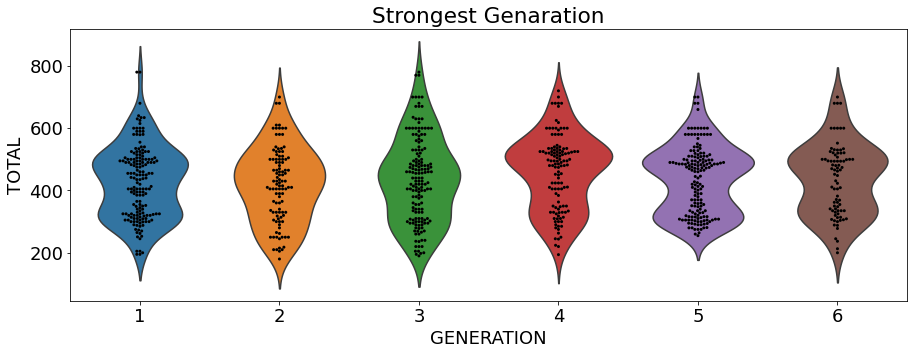

In [ ]:
plt.subplots(figsize = (15,5))
plt.title('Strongest Genaration')
g = sns.violinplot(x="GENERATION", y="TOTAL", inner=None, data=df)
sns.swarmplot(x="GENERATION", y="TOTAL", color="k", size=3, data=df, ax=g)
plt.show()

### Diamond plot

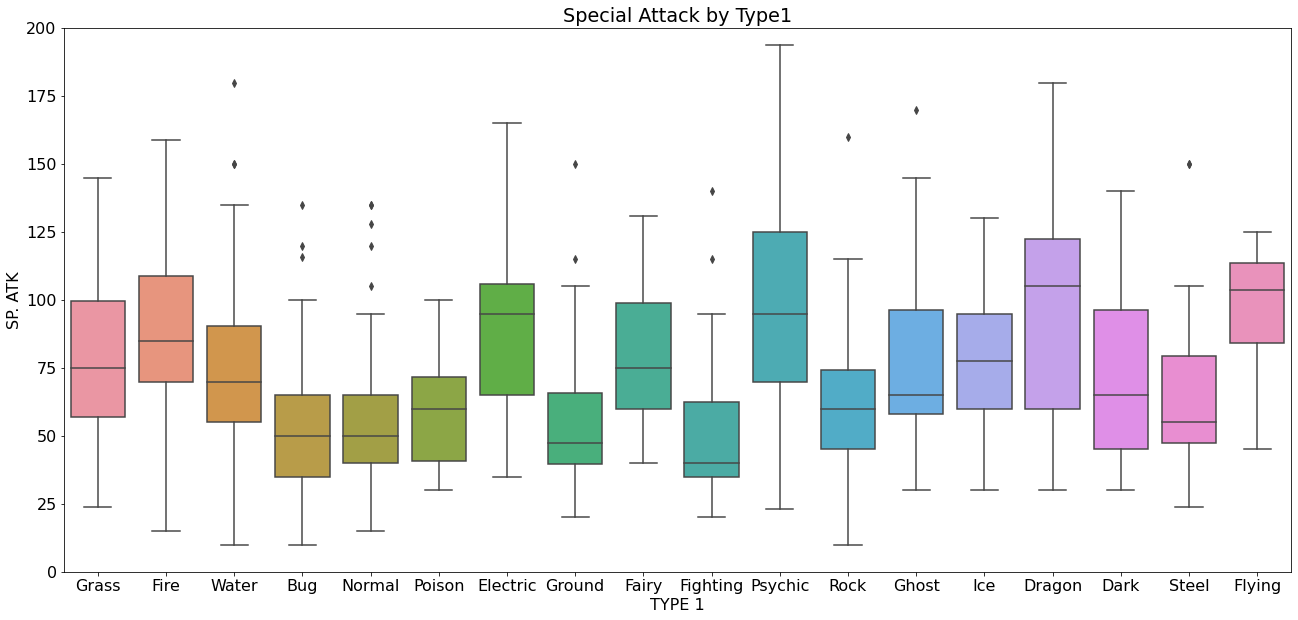

In [ ]:
plt.subplots(figsize = (22,10))
plt.title('Special Attack by Type1')
sns.boxplot(x = "TYPE 1", y = "SP. ATK",data = df)
plt.ylim(0,200)
plt.show()

Ataque especial para pokemon lendario por causa do psychic e mewtwoo + swarnplot e fechou

In [ ]:
# df.loc[df['TYPE 1'] == 'Psychic'].LEGENDARY.value_counts() / df.loc[df['TYPE 1'] == 'Psychic'].LEGENDARY.shape[0]
df_leg = df.loc[df['LEGENDARY'] == True]
print(df_leg['TYPE 1'].value_counts())
print(df['TYPE 1'].value_counts())

Psychic     14
Dragon      12
Fire         5
Electric     4
Water        4
Rock         4
Steel        4
Ground       4
Grass        3
Ice          2
Normal       2
Ghost        2
Dark         2
Flying       2
Fairy        1
Name: TYPE 1, dtype: int64
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: TYPE 1, dtype: int64
